In [1]:
import pandas as pd 
import numpy as np
from plotnine import ggplot, aes, geom_line, geom_point, geom_bar, geom_boxplot
dataframe = pd.read_csv('/home/ruben/Fundamentos-de-Analisis-de-DAtos-I/Practica/Melbourne_housing_FULL.csv')
import scipy.stats as ss
import matplotlib.pyplot as plot
import seaborn as sb
from seaborn import kdeplot

En primer lugar vamos a realizar una inspeccion ocular del dataset:


In [2]:
dataframe.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


Vemos que tenemos en total 21 variables algunas con aspecto de ser cualitativas y otras cuantitativas. En los proximos puntos iremos analizando las caracteristitcas de las mismas.
Vemos ne primer lugar el tipo de las variables:

In [3]:
dataframe.dtypes


Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [4]:
aux=pd.DataFrame({"Suburb":pd.value_counts(dataframe['Suburb']),"Method":pd.value_counts(dataframe['Method']),\
                  "Regionname":pd.value_counts(dataframe['Regionname']),"SellerG":pd.value_counts(dataframe['SellerG']),\
                 "Method":pd.value_counts(dataframe['Method']),"CouncilArea":pd.value_counts(dataframe['CouncilArea'])})
aux

,Suburb,Method,Regionname,SellerG,CouncilArea
@Realty,NaN,NaN,NaN,12.0,NaN
A,NaN,NaN,NaN,1.0,NaN
AIME,NaN,NaN,NaN,1.0,NaN
ASL,NaN,NaN,NaN,5.0,NaN
Abbotsford,137.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...
iProperty,NaN,NaN,NaN,1.0,NaN
iSell,NaN,NaN,NaN,32.0,NaN
iTRAK,NaN,NaN,NaN,33.0,NaN
viewbank,1.0,NaN,NaN,NaN,NaN


In [5]:
print(dataframe.describe())
aux=pd.DataFrame({"Suburb":dataframe["Suburb"].describe(),"CouncilArea":dataframe["CouncilArea"].describe(),\
                  "Regionname":dataframe["Regionname"].describe(),"SellerG":dataframe["SellerG"].describe(),\
                 "Method":dataframe["Method"].describe()})
aux

              Rooms         Price      Distance      Postcode      Bedroom2  \
count  34857.000000  2.724700e+04  34856.000000  34856.000000  26640.000000   
mean       3.031012  1.050173e+06     11.184929   3116.062859      3.084647   
std        0.969933  6.414671e+05      6.788892    109.023903      0.980690   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.350000e+05      6.400000   3051.000000      2.000000   
50%        3.000000  8.700000e+05     10.300000   3103.000000      3.000000   
75%        4.000000  1.295000e+06     14.000000   3156.000000      4.000000   
max       16.000000  1.120000e+07     48.100000   3978.000000     30.000000   

           Bathroom           Car       Landsize  BuildingArea     YearBuilt  \
count  26631.000000  26129.000000   23047.000000   13742.00000  15551.000000   
mean       1.624798      1.728845     593.598993     160.25640   1965.289885   
std        0.724212      1.010771    3398.841946

,Suburb,CouncilArea,Regionname,SellerG,Method
count,34857,34854,34854,34857,34857
unique,351,33,8,388,9
top,Reservoir,Boroondara City Council,Southern Metropolitan,Jellis,S
freq,844,3675,11836,3359,19744


## 3.3 Análisis y resumen numérico de las variables cualitativas del Dataset

para cada una de las variables cualitativas del dataframe comprobaremos sus medidas de centralidad y veremos cuales de ellas tiene sentido analizar



In [6]:
dataframe.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


**Tabla 3.3.1**

### 3.3.1 Analisis de la variable Rooms

Como se puede ver en la tabla 3.3.1 la variable tiene valor en 34857 toma valores discretos en el rango 1 a 16 dormitorios, que es el máximo encontrado. La mitad de la muestra tiene tres dormitorios o menos y el 75% de pisos tienen entre 1 y 4 dormitorios.
A continuacion vamos a ver las frecuencias de la variable

In [7]:
pd.value_counts(dataframe['Rooms'])/dataframe["Rooms"].count()

3     0.432739
2     0.239034
4     0.228247
5     0.049832
1     0.042431
6     0.005852
7     0.000918
8     0.000545
10    0.000172
9     0.000115
12    0.000086
16    0.000029
Name: Rooms, dtype: float64

Como se puede ver mas de un 40% de los pisos vendidos tienen 3 dormitorios que es mas del doble del porcentaje del numero de pisos que tiene 2 dormitorios (un 23%) o 4 dormitorios(un 22,8%).

Pasamos a hacer el cálculo de las medidas de dispersión, en primer lugar calcularemos el coficiente de variación de la variable:

In [8]:
(dataframe["Rooms"].std()/dataframe["Rooms"].mean())*100

32.00029560416976

La variable tiene por tanto un coeficiente de variacion del 32%
Pasamo a calcular el rango y el IQR

In [9]:
rango = dataframe["Rooms"].max() - dataframe["Rooms"].min()
print("Rango ",rango)
iqr = dataframe["Rooms"].quantile(0.75) - dataframe["Rooms"].quantile(0.25)
print("IQR",iqr)

Rango  15
IQR 2.0


Pasaremos a comprobar cuan simetrica es la variables, para ello calculamos en primer lugar el coeficiente de simetria, valores mas aproximados a 0 implican mayor simetría.

In [10]:
asimetria = ss.skew(dataframe["Rooms"])
print("Asimetria",asimetria)

Asimetria 0.4990754028887525


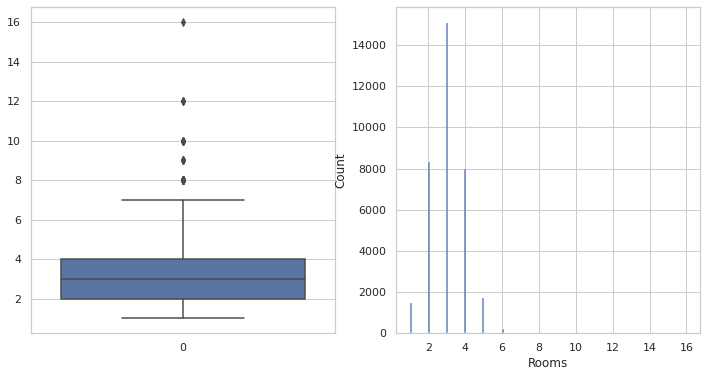

In [23]:
intervalos = range(dataframe["Rooms"].min(), dataframe["Rooms"].max() + 2)
sb.set_theme(style="whitegrid")
'''

subplot(131)
ax1 = sb.boxplot(x=dataframe["Rooms"])

sb.displot(dataframe["Rooms"], color='#F2AB6D', bins=intervalos) #creamos el gráfico en Seaborn

#configuramos en Matplotlib
#plot.xticks(rangos)
plot.ylabel('Frecuencia')
plot.xlabel('# habitaciones')
plot.title('Histograma de habitaciones')

plot.show()
'''
fig, (ax1,ax2) = plot.subplots(1,2,figsize=(12,6))

sb.boxplot(data=dataframe["Rooms"],ax=ax1)
sb.histplot(data=dataframe["Rooms"],ax=ax2)

plot.show()


Como ya se habia comprobado numéricamente la variable es muy simetrica aunque se aprecia unos outliers, viviendas de mas de 7 dormitorios que se deberian eliminar

In [33]:
def mostrar_analisis_var_cuantitativas(data):
    #calcular coeficiente de variacion
 datos_variable=pd.DataFrame([{"coeficiente de Variacion":(data.std()/data.mean())*100,\
                 "rango de la variable":data.max() - dataframe["Rooms"].min(),
                 "rango intercuartilico":data.quantile(0.75) - data.quantile(0.25),
                 "coeficiente de asimetria":ss.skew(data)}])
 return(datos_variable)
       

mostrar_analisis_var_cuantitativas(dataframe["Rooms"])

,coeficiente de Variacion,rango de la variable,rango intercuartilico,coeficiente de asimetria
0,32.000296,15,2.0,0.499075
